# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

#IMPORTS

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.utils import resample

- Are there any missing values in the dataset? there is no missing data, however some values are not posible, such as zeros for glucose, BP, Skin thickness and BMI. will use imputation to clean those values. 

In [8]:
#THERE IS NO MISSING DATA
df = pd.read_csv("C:\\Users\\Waleed\\Desktop\\SL\\archive\\diabetes.csv")

missing_values = df.isnull().sum()
print("Missing data are:", missing_values)

# Imputation steps
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]


for column in columns_to_check:
    median_value = df[column].median()
    df[column].replace(0, median_value, inplace=True)


df.to_csv("C:\\Users\\Waleed\\Desktop\\SL\\archive\\diabetes.csv", index=False)

Missing data are: Pregnancies                               0
Glucose                                   0
BloodPressure                             0
SkinThickness                             0
Insulin                                   0
BMI                                       0
DiabetesPedigreeFunction                  0
Age                                       0
Pregnancies^2                             0
Pregnancies Glucose                       0
Pregnancies BloodPressure                 0
Pregnancies SkinThickness                 0
Pregnancies Insulin                       0
Pregnancies BMI                           0
Pregnancies DiabetesPedigreeFunction      0
Pregnancies Age                           0
Glucose^2                                 0
Glucose BloodPressure                     0
Glucose SkinThickness                     0
Glucose Insulin                           0
Glucose BMI                               0
Glucose DiabetesPedigreeFunction          0
Glucose Age   

- How are the predictor variables related to the outcome variable?

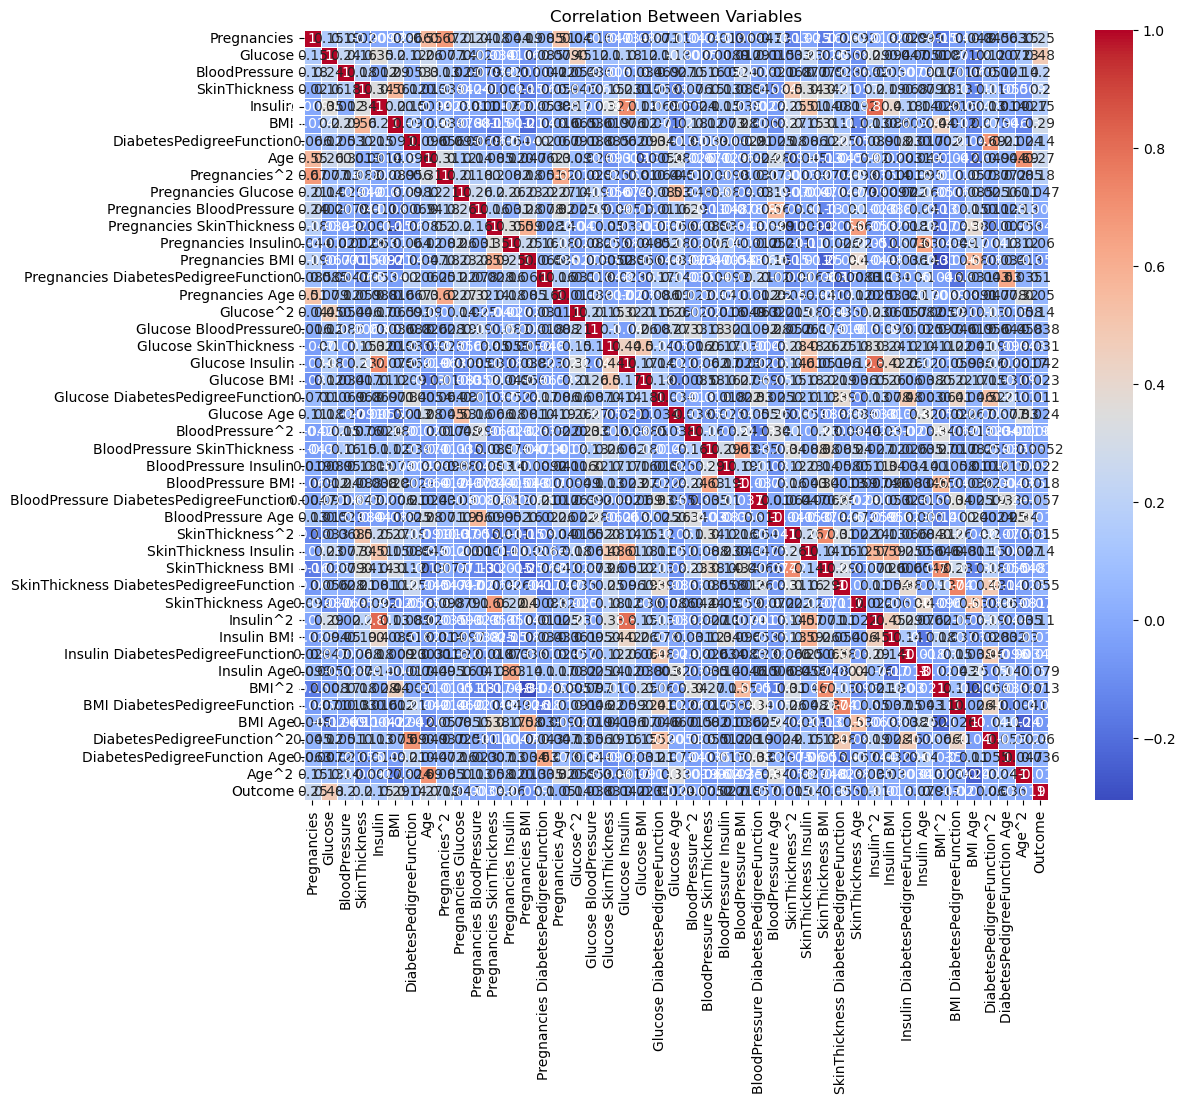

In [9]:
#THE HEAT MAP BELOW SHOWS THE CORRELATION BETWEEN THE VARIABLES

path = "C:/Users/Waleed/Desktop/SL/archive/diabetes.csv"
df = pd.read_csv(path)


plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between Variables')
plt.show()


- What is the distribution of each predictor variable?

IndexError: index 4 is out of bounds for axis 0 with size 4

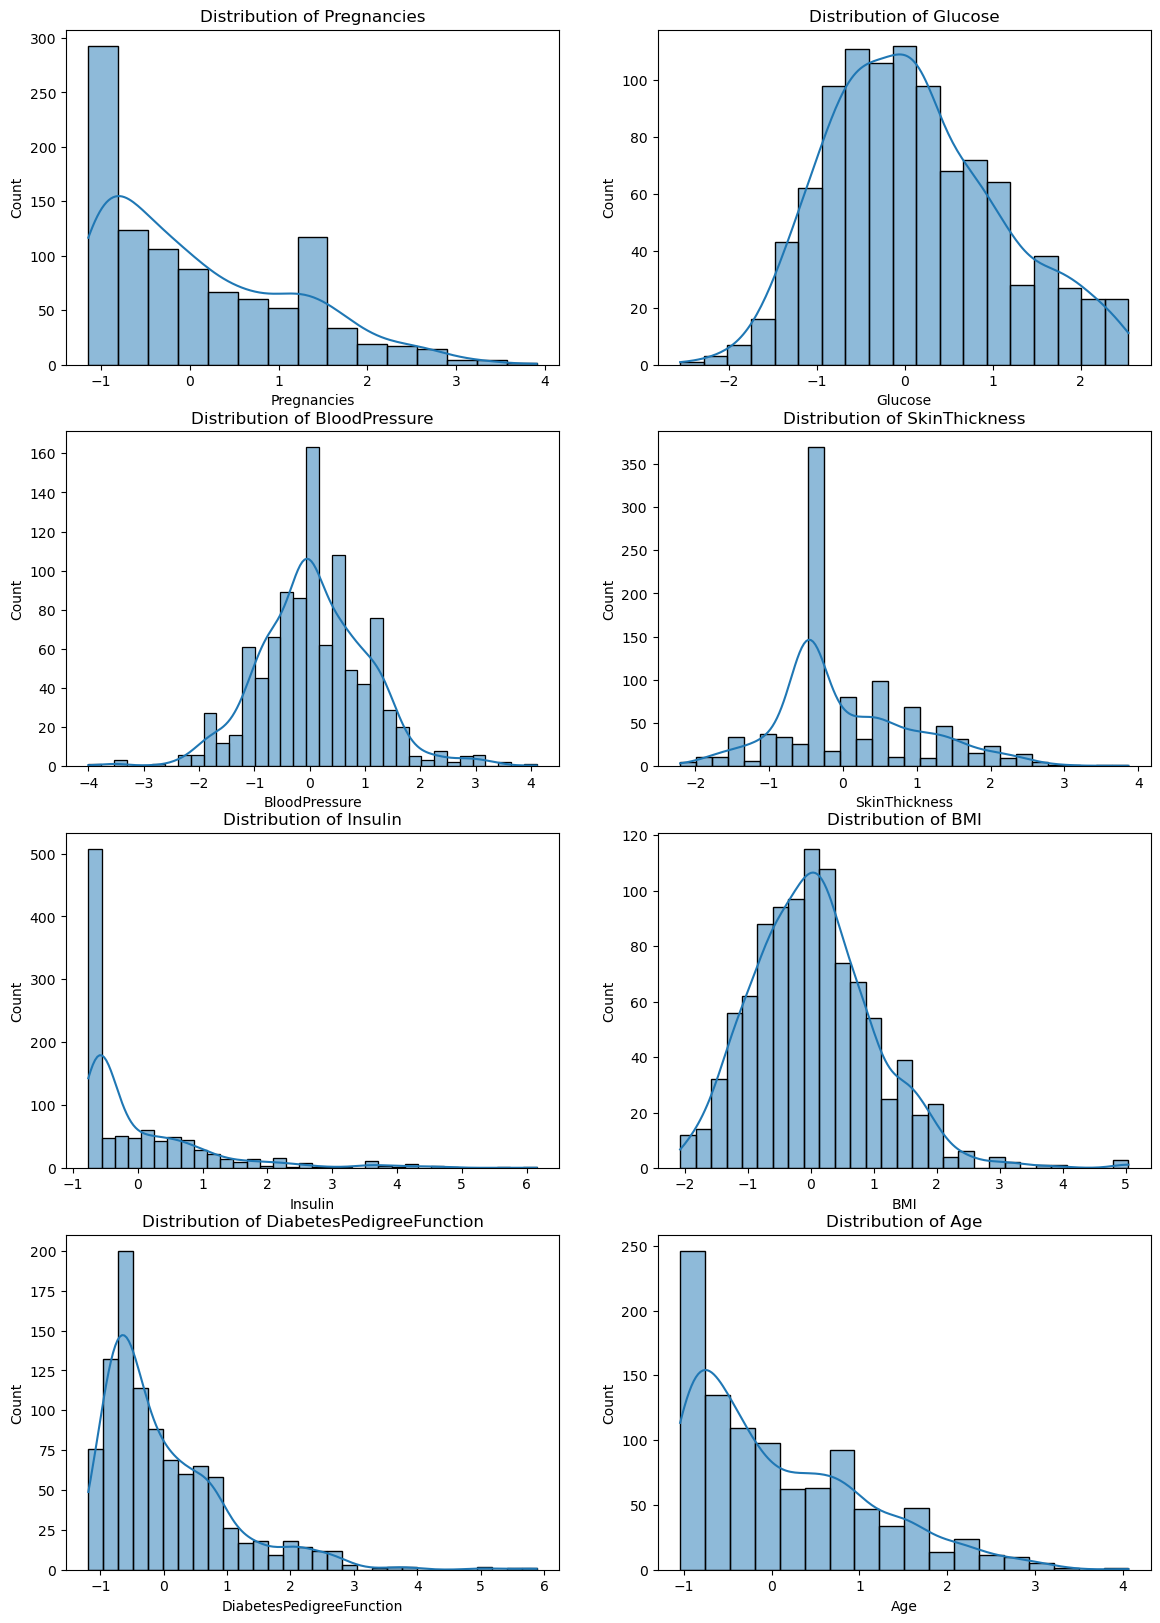

In [10]:
# Plotting the distribution of each predictor variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))

predictor_columns = df.columns[:-1]  # Excluding the 'Outcome' column

for i, column in enumerate(predictor_columns):
    sns.histplot(df[column], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {column}')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Count')

plt.tight_layout()
plt.show()

Pregnancies: Majority of the women have had fewer pregnancies, indicating a right-skewed distribution.

Glucose: The distribution appears somewhat bell-shaped but might have a slight right skew.

BloodPressure: The distribution seems to be fairly normal with a peak around the 70-80 range.

SkinThickness: Most values are clustered towards the lower end, indicating a right-skewed distribution.

Insulin: Strong right-skewed distribution, indicating that most patients have lower insulin levels.

BMI: The distribution seems relatively normal with a peak around 30-35.

DiabetesPedigreeFunction: Strongly right-skewed distribution, indicating that most values are clustered towards the lower end.

Age: The distribution is right-skewed, suggesting there are more younger patients in the dataset.

- Are there any outliers in the predictor variables?

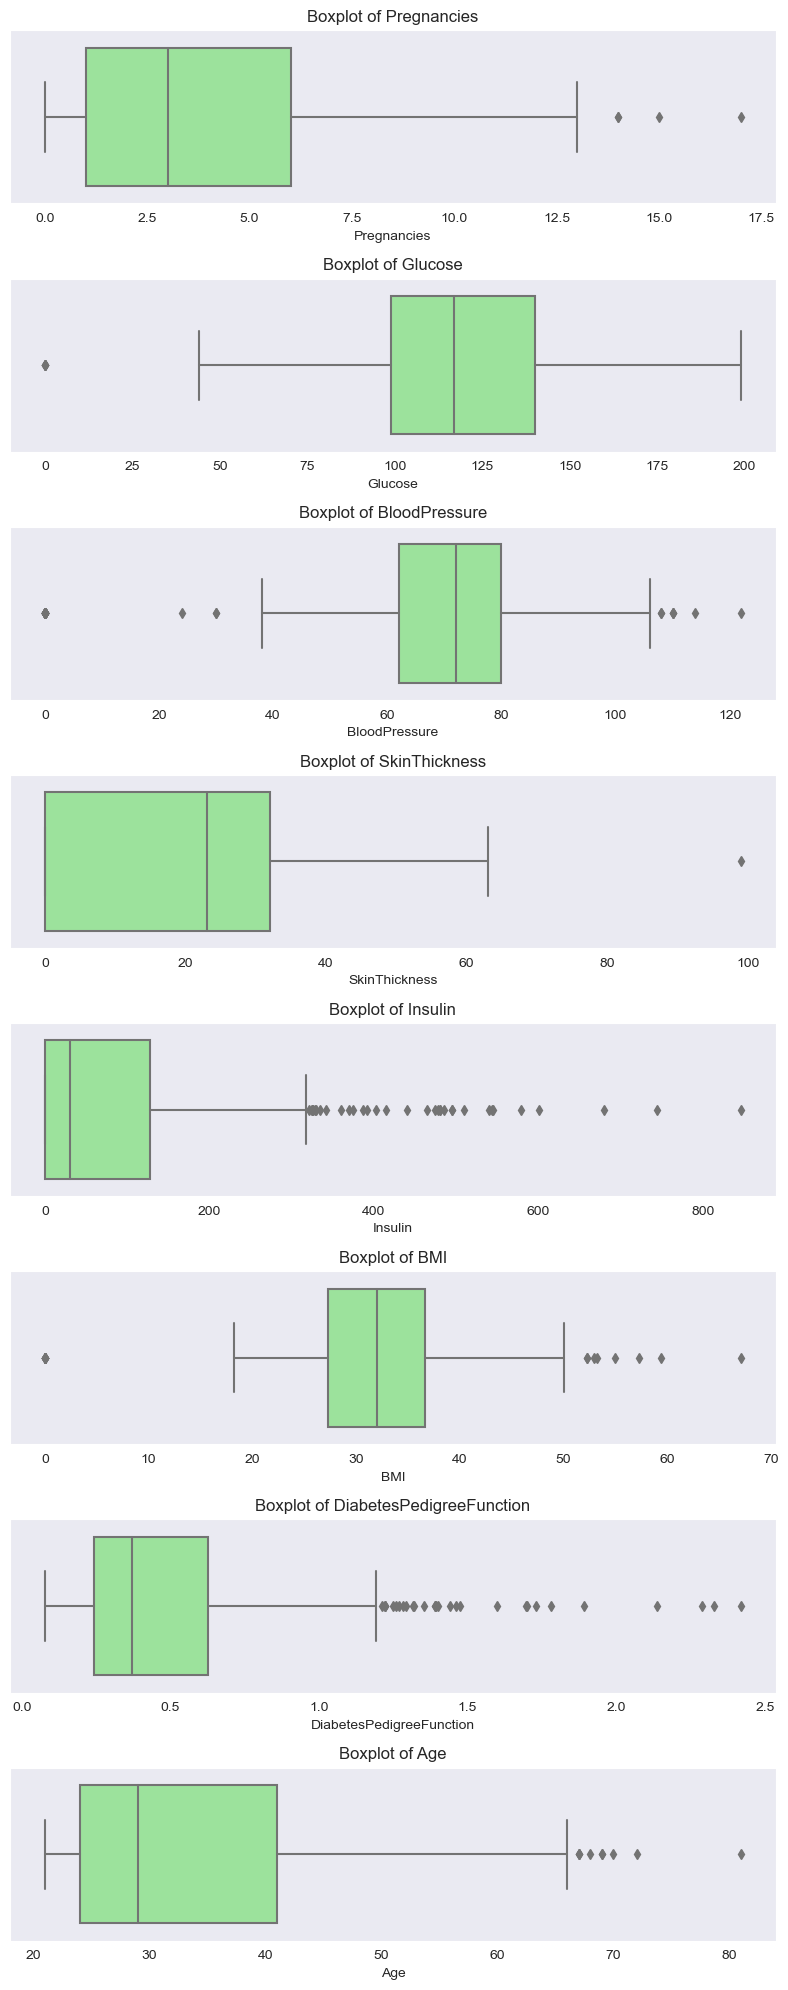

In [ ]:
# Predictor columns (excluding the 'Outcome' column)
predictor_columns = df.columns[:-1]

# Using boxplots to visualize outliers for each predictor variable
fig, axes = plt.subplots(nrows=len(predictor_columns), ncols=1, figsize=(8, 20))

for i, column in enumerate(predictor_columns):
    # Boxplot for each predictor variable
    sns.boxplot(x=df[column], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

Pregnancies: If there are points to the right of the upper whisker, those would be potential outliers, indicating some women had an unusually high number of pregnancies.
Glucose: Points below the lower whisker would indicate unusually low glucose levels.
BloodPressure: Outliers might be present on both the lower and higher ends, suggesting some patients with unusually low or high blood pressure.
SkinThickness: Outliers could be on the upper end, indicating some patients with higher than typical skin thickness.
Insulin: Potential outliers on the higher end would indicate exceptionally high insulin levels for some patients.
BMI: Outliers on the upper end would suggest some patients with extremely high BMI values.
DiabetesPedigreeFunction: Points above the upper whisker would indicate unusually high pedigree function values.
Age: Outliers on the upper end would indicate older patients compared to the majority in the dataset.

- What is the average age of the individuals in the dataset?

In [ ]:
# Calculate the average age
average_age = df['Age'].mean()
print("The average age of the individuals in the dataset is:", average_age)

The average age of the individuals in the dataset is: 33.240885416666664


- What is the average glucose level for individuals with diabetes and without diabetes?

In [ ]:
# Calculate the average glucose level based on diabetes status
average_glucose_by_diabetes_status = df.groupby('Outcome')['Glucose'].mean()

# Print the results
print("Average glucose levels:")
print("For individuals without diabetes (Outcome = 0):", average_glucose_by_diabetes_status[0])
print("For individuals with diabetes (Outcome = 1):", average_glucose_by_diabetes_status[1])

Average glucose levels:
For individuals without diabetes (Outcome = 0): 109.98
For individuals with diabetes (Outcome = 1): 141.25746268656715


- What is the average BMI for individuals with diabetes and without diabetes?

In [ ]:
# Calculate the average BMI based on diabetes status
average_bmi_by_diabetes_status = df.groupby('Outcome')['BMI'].mean()

# Print the results
print("Average BMI values:")
print("For individuals without diabetes (Outcome = 0):", average_bmi_by_diabetes_status[0])
print("For individuals with diabetes (Outcome = 1):", average_bmi_by_diabetes_status[1])

Average BMI values:
For individuals without diabetes (Outcome = 0): 30.3042
For individuals with diabetes (Outcome = 1): 35.14253731343284


- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?

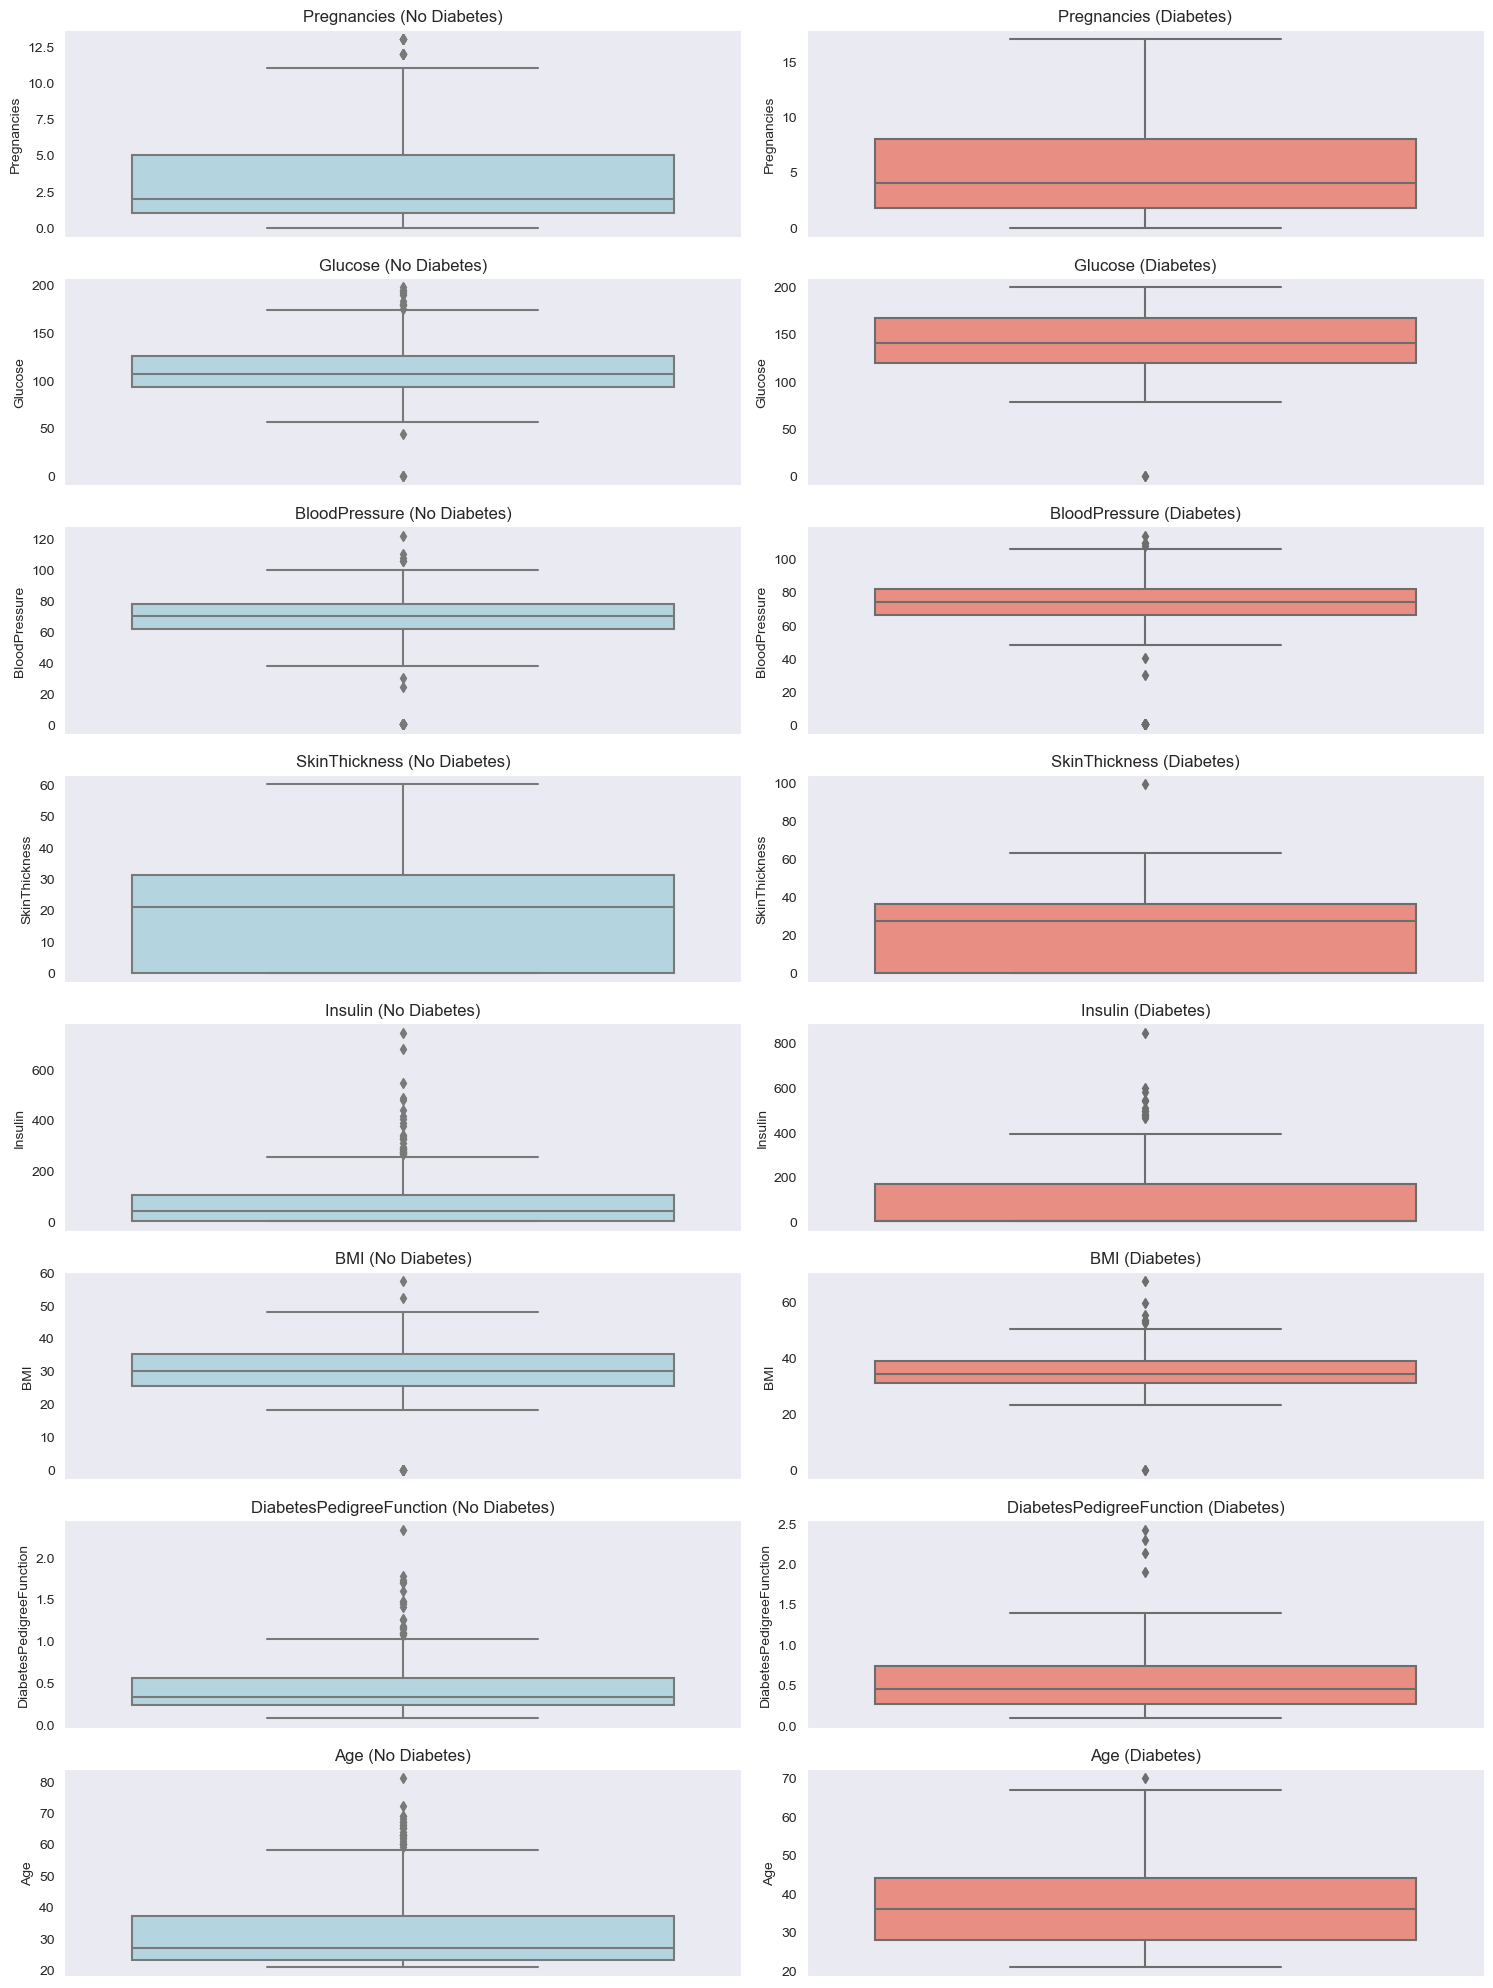

In [ ]:
# Plotting separate boxplots for each predictor variable based on diabetes status
fig, axes = plt.subplots(nrows=len(predictor_columns), ncols=2, figsize=(15, 20))

for i, column in enumerate(predictor_columns):
    # Boxplot for individuals without diabetes (Outcome=0)
    sns.boxplot(y=df[df['Outcome'] == 0][column], ax=axes[i, 0], color='lightblue')
    axes[i, 0].set_title(f'{column} (No Diabetes)')
    axes[i, 0].set_ylabel(column)
    
    # Boxplot for individuals with diabetes (Outcome=1)
    sns.boxplot(y=df[df['Outcome'] == 1][column], ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'{column} (Diabetes)')
    axes[i, 1].set_ylabel(column)

plt.tight_layout()
plt.show()

Pregnancies: Individuals with diabetes tend to have had more pregnancies on average compared to those without diabetes.
Glucose: As expected, individuals diagnosed with diabetes generally have higher glucose levels.
Blood Pressure: The distribution seems similar for both groups, though there's a slightly higher median blood pressure for those with diabetes.
Skin Thickness: Those with diabetes tend to have a slightly thicker skin fold measurement on average.
Insulin: There's a noticeable difference in insulin levels, with those having diabetes showing higher levels.
BMI: Individuals with diabetes tend to have a higher BMI.
Diabetes Pedigree Function: The pedigree function values are slightly higher for those with diabetes, indicating a stronger genetic link.
Age: The age distribution suggests that older individuals are more frequently diagnosed with diabetes in this dataset.

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values: as mentioned in part I, there was no missing data
- Handling outliers: firt identify outliners using box plots as seen in part I, then handle them either through removing them completely, or applying transformations such as log
- Scaling and normalization: Scaled the dataset using Z-score normalization (StandardScaler) to ensure all features are on a similar scale
- Feature Engineering: Generated 2nd-degree polynomial features to capture potential interactions between features and the non-linear relationship between features and the outcome.This increases the feature space, which might help improve model performance
- Handling imbalanced data: Addressed class imbalance in the dataset by oversampling the minority class (Diabetes) using the resample method.

In [ ]:
# Scaling and Normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_data['Outcome'] = df['Outcome']

# Feature Engineering - Polynomial Features
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly_transformer.fit_transform(scaled_data.drop('Outcome', axis=1))
poly_df = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names_out(scaled_data.columns[:-1]))
poly_df['Outcome'] = scaled_data['Outcome']

# Handling Imbalanced Data - Oversampling
df_majority = poly_df[poly_df.Outcome==0]
df_minority = poly_df[poly_df.Outcome==1]
df_minority_oversampled = resample(df_minority, replace=True, n_samples=df_majority.shape[0], random_state=42)
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Save preprocessed data
df_oversampled.to_csv("C:\\Users\\Waleed\\Desktop\\SL\\archive\\diabetes.csv", index=False)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

- Why Logistic Regression Might Be the Better Choice:

- Easy to Understand: Logistic Regression is like a recipe. It tells us which ingredients (like sugar levels or age) matter most. This is great because doctors can easily understand why it's making its guesses.

- Simple & Quick: It's a straightforward method, like basic math, so it works fast. This is perfect if we need quick answers.

- Consistent Results: Unlike some other methods, Logistic Regression gives the same answers every time we ask it.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Load the dataset
path = "C:/Users/Waleed/Desktop/SL/archive/diabetes.csv"
df = pd.read_csv(path)

# Splitting the data into training and testing sets (80% train, 20% test)
predictor_columns = df.columns[:-1]
X = df[predictor_columns]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the models
log_reg = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
random_forest = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Predictions on the testing set
log_reg_preds = log_reg.predict(X_test)
rf_preds = random_forest.predict(X_test)

# Evaluation metrics
metrics = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, log_reg_preds), accuracy_score(y_test, rf_preds)],
    "Precision": [precision_score(y_test, log_reg_preds), precision_score(y_test, rf_preds)],
    "Recall": [recall_score(y_test, log_reg_preds), recall_score(y_test, rf_preds)],
    "F1-Score": [f1_score(y_test, log_reg_preds), f1_score(y_test, rf_preds)],
    "ROC-AUC": [roc_auc_score(y_test, log_reg_preds), roc_auc_score(y_test, rf_preds)]
}

evaluation_df = pd.DataFrame(metrics)
print(evaluation_df)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.746753   0.637931  0.672727  0.654867  0.730303
1        Random Forest  0.720779   0.607143  0.618182  0.612613  0.697980


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Data Issues: Some data in our study, like sugar levels, didn't make sense. We fixed these odd values to make our study better.

- Balancing the Data: Our study had more healthy people than those with diabetes. We added more diabetes cases to make it even, helping our computer model learn better.

- Important Details: Our study showed that sugar levels, body weight, and age are big clues to figure out if someone might have diabetes. This matches what doctors say too!

- Computer Model: We used a computer program to guess if someone has diabetes based on their details. Picking the right program is crucial, especially when health is involved.